In [1]:
#importing necessary libraries

import numpy as np
import matplotlib.pyplot as plt
from lmfit.models import VoigtModel

In [31]:
#fits voigt profile to individual peaks given the standard deviation (noise) in the data

def voigtUniPeak(peakData1, sd1):
    yForFit1 = 1 - peakData1[:, 1]
    xForFit1 = peakData1[:, 0]
    mod1 = VoigtModel()
    params1 = mod1.guess(yForFit1, x = xForFit1)
    res1 = mod1.fit(yForFit1, params1, x = xForFit1, weights = 1/sd1)
    plt.plot(xForFit1, (1 - yForFit1), label = 'Data')
    plt.plot(xForFit1, (1 - res1.best_fit), label = 'Voigt profile fit')
    plt.legend()
    return {'Centre': res1.params['center'].value, 
            'FWHM': res1.params['fwhm'].value, 
            'ChiSq': res1.chisqr, 
            'RedChiSq': res1.redchi}

In [4]:
#importing data

data5000 = np.loadtxt('Pentacene_air_snr5000.txt')

In [5]:
#peak parameters found by hand (required only for testing purposes)

peakmins = np.zeros(5)
peakmaxs = np.zeros(5)
peakcens = np.zeros(5)

peakmins[0] = 5264.222303
peakmaxs[0] = 5270.360895
peakcens[0] = 5267.600206

peakmins[1] = 5287.032308
peakmaxs[1] = 5290.810678
peakcens[1] = 5288.886049

peakmins[2] = 5303.716283
peakmaxs[2] = 5308.335695
peakcens[2] = 5305.721707

peakmins[3] = 5335.136806
peakmaxs[3] = 5342.695359
peakcens[3] = 5337.921532

peakmins[4] = 5358.495471
peakmaxs[4] = 5365.142247
peakcens[4] = 5361.090278

In [15]:
#extracting wavelengths and intensities within ranges from lab data

peak1data = data5000[np.logical_and(data5000[:, 0]>=peakmins[0], data5000[:, 0]<=peakmaxs[0])]
peak2data = data5000[np.logical_and(data5000[:, 0]>=peakmins[1], data5000[:, 0]<=peakmaxs[1])]
peak3data = data5000[np.logical_and(data5000[:, 0]>=peakmins[2], data5000[:, 0]<=peakmaxs[2])]
peak4data = data5000[np.logical_and(data5000[:, 0]>=peakmins[3], data5000[:, 0]<=peakmaxs[3])]
peak5data = data5000[np.logical_and(data5000[:, 0]>=peakmins[4], data5000[:, 0]<=peakmaxs[4])]

{'value': 5267.5671986793695, 'fwhm': 2.3303974220070933, 'chiSq': 649.697112396788, 'redChiSq': 2.451687216591653}


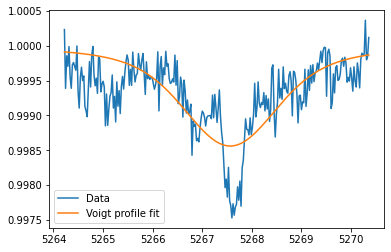

In [24]:
peak1Params = voigtUniPeak(peak1data, 0.0002402523653397399)
print(peak1Params)

In [47]:
print(np.linspace(0, data5000[:, 0].size, 6, dtype = int))
#for i in range(6): print(i)
print(data5000[0:7759, 0].size)

[   0 1551 3103 4655 6207 7759]
7759


In [50]:
#fits multiple peaks given the number of peaks and the standard deviation (noise) in the data

def voigtMultiPeakNG(peakData2, nosPeak1, sd2):
    if (not isinstance(nosPeak1, int)) or nosPeak1 < 1:
        print('Please enter valid number of peaks (>=1)')
    else:
        xForFit2 = peakData2[:, 0]
        yForFit2 = 1 - peakData2[:, 1]
        
        idxs1 = np.linspace(0, peakData2[:, 0].size, (nosPeak1+1), dtype = int)
        #print(idxs1)
        
        vmarr1 = np.empty(shape = nosPeak1, dtype = object)
        
        vmarr1[0] = VoigtModel(prefix = 'VM1_')
        params2 = vmarr1[0].guess(yForFit2[idxs1[0]:idxs1[1]], x = xForFit2[idxs1[0]:idxs1[1]])
        
        if nosPeak1 > 1:
            for it1 in range(nosPeak1-1):
                pref1 = 'VM' + str(it1+2) + '_'
                vmarr1[it1+1] = VoigtModel(prefix = pref1)
                params2.update(vmarr1[it1+1].guess(yForFit2[idxs1[it1+1]:idxs1[it1+2]], x = xForFit2[idxs1[it1+1]:idxs1[it1+2]]))
            
            mod2 = np.sum(vmarr1)
        else:
            mod2 = vmarr1[0]
        
        res2 = mod2.fit(yForFit2, params2, x = xForFit2, weights = 1/sd2)
        plt.plot(xForFit2, (1 - yForFit2), label = 'Data')
        plt.plot(xForFit2, (1 - res2.best_fit), label = 'Multipeak Voigt profile fit')
        plt.legend()
        
        tbr1 = {}
        
        for it2 in range(nosPeak1):
            cenkey1 = 'Centre' + str(it2+1)
            cenval1 = 'VM' + str(it2+1) + '_center'
            fwhmkey1 = 'FWHM' + str(it2+1)
            fwhmval1 = 'VM' + str(it2+1) + '_fwhm'
            tbr1.update({cenkey1: res2.params[cenval1].value})
            tbr1.update({fwhmkey1: res2.params[fwhmval1].value})
        
        tbr1.update({'ChiSq': res2.chisqr})
        tbr1.update({'RedChiSq': res2.redchi})
        
        return tbr1

{'Centre1': 5267.570355467864, 'FWHM1': 2.387004721088341, 'Centre2': 5288.733387991483, 'FWHM2': 1.6191303650934568, 'Centre3': 5305.67613618112, 'FWHM3': 1.4723896780507166, 'Centre4': 5338.137939720127, 'FWHM4': 2.054282796266538, 'Centre5': 5361.262542685421, 'FWHM5': 2.0899186229578257, 'ChiSq': 17321.231659626035, 'RedChiSq': 2.2367292948897255}


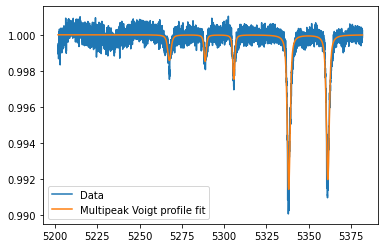

In [59]:
allPeakParams = voigtMultiPeakNG(data5000, 5, 0.0002402523653397399)
print(allPeakParams)